In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
import matplotlib as mpl

## 全民健康保險保險對象保險費及滯納金分期繳納按行政區分布
資料來源：[健康保險資料開放服務](https://data.nhi.gov.tw/Datasets/DatasetDetail.aspx?id=437&Mid=A110030)

In [7]:
df = pd.read_csv('/Users/apple/Downloads/DataSetResource.csv')

In [15]:
df.head()

,縣市別,鄉鎮市區,性別,年齡級距,人數,申請金額,繳納金額
0,宜蘭縣,三星鄉,女,20~24,3,25,10
1,宜蘭縣,三星鄉,男,20~24,6,128,53
2,宜蘭縣,三星鄉,女,25~29,16,338,176
3,宜蘭縣,三星鄉,男,25~29,29,506,386
4,宜蘭縣,三星鄉,女,30~34,30,669,523


### 依照不同縣市別去分群，將人數和申請金額以及繳納金額做總和 （金額的單位為：千元）

In [14]:
grouped = df.groupby("縣市別")
grouped.sum()

,人數,申請金額,繳納金額
縣市別,,,
南投縣,8606,278624,154076
嘉義市,5063,144396,89986
嘉義縣,7816,236491,140154
基隆市,8139,215139,140168
宜蘭縣,6877,205117,125906
屏東縣,21688,634042,366942
彰化縣,13210,434328,251606
新北市,59663,1911838,1134955
新竹市,5264,162742,100511


### 計算各縣市申請金額跟繳納金額的差異以及跟人口的比值

In [37]:
group2 = grouped.sum()
group2.繳納金額 - group2.申請金額

縣市別
南投縣   -124548
嘉義市    -54410
嘉義縣    -96337
基隆市    -74971
宜蘭縣    -79211
屏東縣   -267100
彰化縣   -182722
新北市   -776883
新竹市    -62231
新竹縣    -84194
桃園市   -541792
澎湖縣    -16515
臺中市   -517699
臺北市   -282589
臺南市   -401561
臺東縣    -84714
花蓮縣   -117621
苗栗縣    -96062
連江縣     -2459
金門縣    -24880
雲林縣   -119786
高雄市   -648495
dtype: int64

若單純考慮此兩筆金額...健保虧很大

In [39]:
sum(group2.繳納金額 - group2.申請金額)

-4656780

除以各縣市人口數，比例上來講南投縣比例最高，平均一個人欠繳給政府14000元的看醫生費用

In [33]:
(-(group2.繳納金額 - group2.申請金額)) / group2.人數 

縣市別
南投縣    14.472229
嘉義市    10.746593
嘉義縣    12.325614
基隆市     9.211328
宜蘭縣    11.518249
屏東縣    12.315566
彰化縣    13.832097
新北市    13.021186
新竹市    11.821998
新竹縣    12.210877
桃園市    13.079813
澎湖縣    12.842146
臺中市    12.580472
臺北市    10.316479
臺南市    12.808963
臺東縣    11.785476
花蓮縣    10.491571
苗栗縣    13.915979
連江縣    12.356784
金門縣    12.931393
雲林縣    13.376438
高雄市    12.054483
dtype: float64

### 各縣市的使用健保狀態折線圖

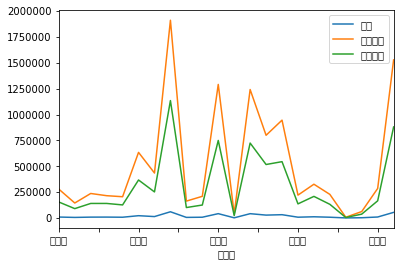

In [51]:
group2.plot.line()

### 各縣市很明顯地，平均申請金額都大於繳納金額，看病的人多，醫生錢也拿很多，若有更多其他資料可以更深入探討。